# 데이터 분석 예제

# 초기 설정

In [ ]:
import sys

assert sys.version_info >= (3, 7)

In [ ]:
from packaging import version
import sklearn

assert version.parse(sklearn.__version__) >= version.parse("1.0.1")

In [ ]:
# 기본라이브러리 import
from google.colab import drive
import random, os, json, pickle
import re
import pandas as pd

import warnings
warnings.filterwarnings(action='ignore')

### 구글드라이브 마운트 및 패스 설정

In [ ]:
# 구글 드라이브 mount
drive.mount('/content/gdrive')

# 데이터 파일 위치
colab_path = '/content/gdrive/My Drive/Colab Notebooks/machinelearning/'
# 데이터 파일 로드

# boston_df = pd.read_csv(colab_path+'boston.csv')
# boston_df

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
import matplotlib.pyplot as plt

plt.rc('font', size=12)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=12)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

출력 결과를 일정하게 유지하기 위해 랜덤 시드를 지정합니다:

In [ ]:
import numpy as np

np.random.seed(42)

# 소득과 삶의 만족도

In [2]:
import matplotlib.pyplot as plt
import numpy as np


# 데이터를 다운로드하고 준비
data_root = "https://github.com/ageron/data/raw/main/"
lifesat = pd.read_csv(data_root + "lifesat/lifesat.csv")
X = lifesat[["GDP per capita (USD)"]].values
y = lifesat[["Life satisfaction"]].values
print(lifesat)

#구글 드라이브에 데이터셋 저장
lifesat.to_csv(colab_path+'lifesat.csv')

NameError: name 'pd' is not defined

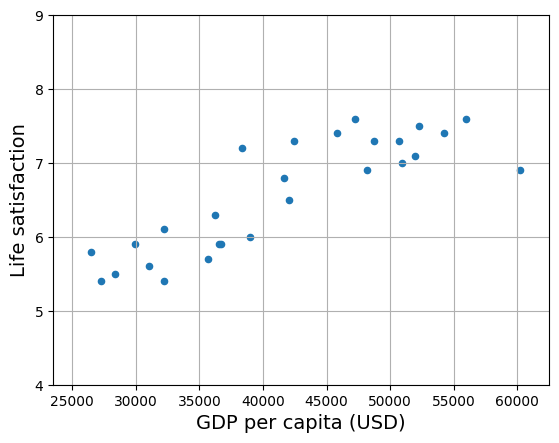

키프로스 GDP = [[37655.2]]
키프로스 추정 만족도 = [[6.30165767]]


In [ ]:
# 데이터를 그래프로
lifesat.plot(kind='scatter', grid=True,
             x="GDP per capita (USD)", y="Life satisfaction")
plt.axis([23_500, 62_500, 4, 9])
plt.show()

#모델 선택
from sklearn.linear_model import LinearRegression
#  선형 모델를 선택
model = LinearRegression()

# 모델을 훈련 (선형회귀, 지도학습)
model.fit(X, y)

# 키프로스에 대해 예측을 만듬
X_new = [[37_655.2]]  # 2020년 키프로스 1인당 GDP
print(f'키프로스 GDP = {X_new}')
print(f'키프로스 추정 만족도 = {model.predict(X_new)}') # 출력 [[6.30165767]]

### LinearRegression

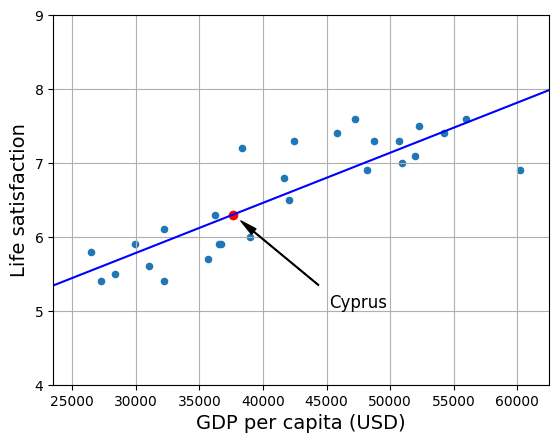

In [ ]:
#  선형 모델를 선택
model = LinearRegression()

# 모델을 훈련
model.fit(X, y)

# 키프로스에 대해 예측을 생성
X_new = [[37_655.2]]  # 2020년 키프로스 1인당 GDP
# y_pred = model.predict(X_new)

# 데이터를 그래프로
lifesat.plot(kind='scatter', grid=True,
             x="GDP per capita (USD)", y="Life satisfaction")
plt.axis([23_500, 62_500, 4, 9])

#키프로스 GDP로부터 추정한 만족도를 점으로 표시(붉은색)
plt.scatter(X_new, model.predict(X_new), c='red')
plt.annotate('Cyprus', xy=(X_new[0][0], model.predict(X_new)[0][0]),
             xytext=(X_new[0][0]*1.2, model.predict(X_new)[0][0]*0.8),
              fontsize=12,
              arrowprops=dict(facecolor='black', width=0.5,
                              shrink=0.08, headwidth=5))
# Plot the regression line 선형회귀 직선의식
plt.plot([23_500, 62_500],
         [model.predict([[23_500]])[0][0], model.predict([[62_500]])[0][0]],
         c='b')
plt.show()

이전 코드에서 선형 회귀 모델을 k-최근접 이웃 회귀(이 경우 k=3)로 바꾸려면 간단하게 다음 두 라인만 변경됨

```python
from sklearn.linear_model import LinearRegression

model = LinearRegression()
```

아래와 같이 수정

```python
from sklearn.neighbors import KNeighborsRegressor

model = KNeighborsRegressor(n_neighbors=3)
```

### KNN

In [ ]:
X = [[0], [3], [1],[1.5]]
from sklearn.neighbors import NearestNeighbors
model = NearestNeighbors(n_neighbors=2)
model.fit(X)
A = model.kneighbors_graph(X)
A.toarray()

array([[1., 0., 1., 0.],
       [0., 1., 0., 1.],
       [0., 0., 1., 1.],
       [0., 0., 1., 1.]])

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# 데이터를 다운로드하고 준비
data_root = "https://github.com/ageron/data/raw/main/"
lifesat = pd.read_csv(data_root + "lifesat/lifesat.csv")
X = lifesat[["GDP per capita (USD)"]].values
y = lifesat[["Life satisfaction"]].values

# 3-최근접 이웃 회귀 모델로 적용
from sklearn.neighbors import KNeighborsRegressor

model = KNeighborsRegressor(n_neighbors=3)

# 모델을 훈련
model.fit(X, y)

# 키프로스에 대해 예측
X_new = [[37_655.2]]  # 2020년 키프로스 1인당 GDP
print(model.predict(X_new)) # 출력 [[6.33333333]]

# 키프로스에 대한 예측을 만듬
print(f'키프로스 소득{X_new[0]}의 만족도{model.predict(X_new)}')

# 키프로스의 주변 3개 데이터(X 기준)
A = model.kneighbors_graph(X_new)

print(f'X_new = {X_new[0]}')
print(f'키프로스 소득과 가까운 이웃들{A.toarray()[0]}')
print(f'키프로스 소득과 가까운 이웃들의 소득{X[A.toarray()[0]==1.0]}')
print(f'그 이웃들의 만족도 : {y[A.toarray()[0]==1.0]}')
print(f'그 이웃들의 만족도 평균 : {np.mean(y[A.toarray()[0]==1.0])}')

[[6.33333333]]
키프로스 소득[37655.2]의 만족도[[6.33333333]]
X_new = [37655.2]
키프로스 소득과 가까운 이웃들[0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0.]
키프로스 소득과 가까운 이웃들의 소득[[36547.73895598]
 [36732.03474403]
 [38341.30757041]]
그 이웃들의 만족도 : [[5.9]
 [5.9]
 [7.2]]
그 이웃들의 만족도 평균 : 6.333333333333333


[[6.33333333]]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0.]


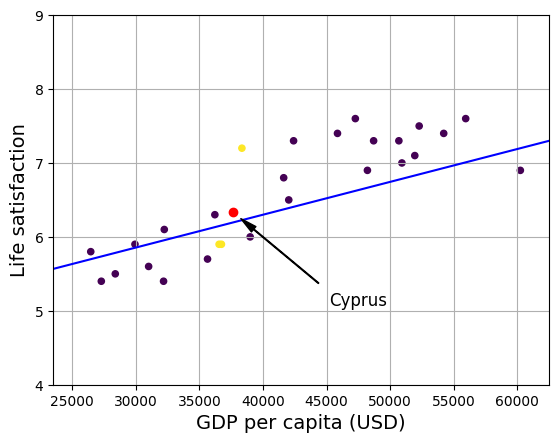

In [ ]:
#  선형 모델를 선택합니다
#weights 파라미터는 'uniform', 'distance' 두가지가 있음

#model = KNeighborsRegressor(n_neighbors=3, weights = 'distance')
model = KNeighborsRegressor(n_neighbors=3, weights = 'uniform')

# 모델 훈련
model.fit(X, y)

# 키프로스에 대해 예측
X_new = [[37_655.2]]  # 2020년 키프로스 1인당 GDP
print(model.predict(X_new)) # 출력 [[6.30165767]]

# 키프로스의 주변 3개 데이터(X 기준)
A = model.kneighbors_graph(X_new)

# 데이터를 그래프로
#학습에 사용한 국가들의 산점도
print(A.toarray()[0])
lifesat.plot(kind='scatter', grid=True,
             x="GDP per capita (USD)", y="Life satisfaction", c=A.toarray()[0])
plt.axis([23_500, 62_500, 4, 9])

#키프로스의 GDP와 만족도 추정값을 이용한 점(붉은색) 그림
plt.scatter(X_new, model.predict(X_new), c='red')
plt.annotate('Cyprus', xy=(X_new[0][0], model.predict(X_new)[0][0]),
             xytext=(X_new[0][0]*1.2, model.predict(X_new)[0][0]*0.8),
              fontsize=12,
              arrowprops=dict(facecolor='black', width=0.5,
                              shrink=0.08, headwidth=5))
# Plot the regression line
plt.plot([23_500, 62_500],
         [model.predict([[25_500]])[0][0], model.predict([[60_500]])[0][0]],
         c='b')
plt.show()

# 데이터 분석 절차

데이터와 그림 생성하기

`lifesat.csv` 데이터셋을 만들기 위한 코드

## 삶의 만족도 데이터 로드하고 준비하기

`lifesat.csv` 파일을 만들기 위해 [OECD 웹사이트](http://stats.oecd.org/index.aspx?DataSetCode=BLI)에서 (각 국가의 삶의 만족도를 얻으려고)

(2020년) BLI(Better Life Index) 데이터와 [OurWorldInData.org](https://ourworldindata.org/grapher/gdp-per-capita-worldbank)에서

(2020년까지) 세계 은행의 1인당 GDP 데이터를 다운로드

In [ ]:
#lifesat 디렉토리 생성
import urllib.request

datapath = Path(colab_path + 'lifesat/')
datapath.mkdir(parents=True, exist_ok=True)

#### 데이터 gdrive에 다운로드

In [ ]:
data_root = "https://github.com/ageron/data/raw/main/"
for filename in ("oecd_bli.csv", "gdp_per_capita.csv"):
    if not (datapath / filename).is_file():
        print("Downloading", filename)
        url = data_root + "lifesat/" + filename
        urllib.request.urlretrieve(url, datapath / filename)

In [ ]:
oecd_bli = pd.read_csv(datapath / "oecd_bli.csv")
gdp_per_capita = pd.read_csv(datapath / "gdp_per_capita.csv")

In [ ]:
oecd_bli[oecd_bli['Country']=='Austria'][oecd_bli["INEQUALITY"]=="TOT"]

,LOCATION,Country,INDICATOR,Indicator,MEASURE,Measure,INEQUALITY,Inequality,Unit Code,Unit,PowerCode Code,PowerCode,Reference Period Code,Reference Period,Value,Flag Codes,Flags
1,AUT,Austria,JE_LMIS,Labour market insecurity,L,Value,TOT,Total,PC,Percentage,0,Units,NaN,NaN,3.50,NaN,NaN
163,AUT,Austria,CG_SENG,Stakeholder engagement for developing regulations,L,Value,TOT,Total,AVSCORE,Average score,0,Units,NaN,NaN,1.30,NaN,NaN
199,AUT,Austria,HO_BASE,Dwellings without basic facilities,L,Value,TOT,Total,PC,Percentage,0,Units,NaN,NaN,0.90,NaN,NaN
236,AUT,Austria,HO_HISH,Housing expenditure,L,Value,TOT,Total,PC,Percentage,0,Units,NaN,NaN,21.00,NaN,NaN
273,AUT,Austria,PS_FSAFEN,Feeling safe walking alone at night,L,Value,TOT,Total,PC,Percentage,0,Units,NaN,NaN,80.60,NaN,NaN
389,AUT,Austria,HO_NUMR,Rooms per person,L,Value,TOT,Total,RATIO,Ratio,0,Units,NaN,NaN,1.60,NaN,NaN
426,AUT,Austria,IW_HADI,Household net adjusted disposable income,L,Value,TOT,Total,USD,US Dollar,0,Units,NaN,NaN,33541.00,NaN,NaN
455,AUT,Austria,IW_HNFW,Household net wealth,L,Value,TOT,Total,USD,US Dollar,0,Units,NaN,NaN,308325.00,NaN,NaN
484,AUT,Austria,JE_EMPL,Employment rate,L,Value,TOT,Total,PC,Percentage,0,Units,NaN,NaN,72.00,NaN,NaN
601,AUT,Austria,JE_LTUR,Long-term unemployment rate,L,Value,TOT,Total,PC,Percentage,0,Units,NaN,NaN,1.84,NaN,NaN


In [ ]:
gdp_per_capita.sort_values(by="Year", inplace=True, ascending=False)
gdp_per_capita.head()

,Entity,Code,Year,"GDP per capita, PPP (constant 2017 international $)"
7108,Zimbabwe,ZWE,2020,2744.690758
6573,Trinidad and Tobago,TTO,2020,23728.158646
6512,Togo,TGO,2020,2107.877261
604,Belgium,BEL,2020,48210.033111
2295,Gabon,GAB,2020,14399.868809


2020년도 것만 남기도록 1인당 GDP 데이터를 전처리

gdp_per_capita에서 GDP 가져옴

In [ ]:
gdp_year = 2020
gdppc_col = "GDP per capita (USD)"
lifesat_col = "Life satisfaction"

gdp_per_capita = gdp_per_capita[gdp_per_capita["Year"] == gdp_year]
gdp_per_capita = gdp_per_capita.drop(["Code", "Year"], axis=1)
gdp_per_capita.columns = ["Country", gdppc_col]
gdp_per_capita.set_index("Country", inplace=True)

gdp_per_capita.shape

(224, 1)

`Life satisfaction` 열만 남도록 OECD BLI 데이터를 전처리

`oecd_bli`의 `Value`에서 만족도 가져옴

In [ ]:
oecd_bli = oecd_bli[oecd_bli["INEQUALITY"]=="TOT"]
oecd_bli = oecd_bli.pivot(index="Country", columns="Indicator", values="Value")

oecd_bli.head()

Indicator,Air pollution,Dwellings without basic facilities,Educational attainment,Employees working very long hours,Employment rate,Feeling safe walking alone at night,Homicide rate,Household net adjusted disposable income,Household net wealth,Housing expenditure,...,Personal earnings,Quality of support network,Rooms per person,Self-reported health,Stakeholder engagement for developing regulations,Student skills,Time devoted to leisure and personal care,Voter turnout,Water quality,Years in education
Country,,,,,,,,,,,,,,,,,,,,,
Australia,5.0,NaN,81.0,13.04,73.0,63.5,1.1,32759.0,427064.0,20.0,...,49126.0,95.0,NaN,85.0,2.7,502.0,14.35,91.0,93.0,21.0
Austria,16.0,0.9,85.0,6.66,72.0,80.6,0.5,33541.0,308325.0,21.0,...,50349.0,92.0,1.6,70.0,1.3,492.0,14.55,80.0,92.0,17.0
Belgium,15.0,1.9,77.0,4.75,63.0,70.1,1.0,30364.0,386006.0,21.0,...,49675.0,91.0,2.2,74.0,2.0,503.0,15.70,89.0,84.0,19.3
Brazil,10.0,6.7,49.0,7.13,61.0,35.6,26.7,NaN,NaN,NaN,...,NaN,90.0,NaN,NaN,2.2,395.0,NaN,79.0,73.0,16.2
Canada,7.0,0.2,91.0,3.69,73.0,82.2,1.3,30854.0,423849.0,22.0,...,47622.0,93.0,2.6,88.0,2.9,523.0,14.56,68.0,91.0,17.3


이제 삶의 만족도 데이터와 1인당 GDP 데이타를 합친 뒤 1인당 GDP 열과 삶의 만족도 열만 남깁니다:

In [ ]:
full_country_stats = pd.merge(left=oecd_bli, right=gdp_per_capita,
                              left_index=True, right_index=True)
full_country_stats.sort_values(by=gdppc_col, inplace=True)
full_country_stats.head()

,Air pollution,Dwellings without basic facilities,Educational attainment,Employees working very long hours,Employment rate,Feeling safe walking alone at night,Homicide rate,Household net adjusted disposable income,Household net wealth,Housing expenditure,...,Quality of support network,Rooms per person,Self-reported health,Stakeholder engagement for developing regulations,Student skills,Time devoted to leisure and personal care,Voter turnout,Water quality,Years in education,GDP per capita (USD)
Country,,,,,,,,,,,,,,,,,,,,,
South Africa,22.0,37.0,73.0,18.12,43.0,36.1,13.7,NaN,NaN,18.0,...,88.0,NaN,NaN,NaN,NaN,14.92,73.0,67.0,NaN,11466.189672
Colombia,10.0,23.9,54.0,26.56,67.0,44.4,24.5,NaN,NaN,17.0,...,89.0,1.2,NaN,1.4,410.0,NaN,53.0,75.0,14.1,13441.492952
Brazil,10.0,6.7,49.0,7.13,61.0,35.6,26.7,NaN,NaN,NaN,...,90.0,NaN,NaN,2.2,395.0,NaN,79.0,73.0,16.2,14063.982505
Mexico,16.0,25.5,38.0,28.70,61.0,41.8,18.1,NaN,NaN,20.0,...,81.0,1.0,66.0,3.2,416.0,NaN,63.0,68.0,15.2,17887.750736
Chile,16.0,9.4,65.0,9.72,63.0,47.9,4.2,NaN,100967.0,18.0,...,85.0,1.2,57.0,1.3,443.0,NaN,47.0,71.0,17.5,23324.524751


In [ ]:
# left_index=True, right_index=True는 oecd_bli와 gdp_per_capita의 인덱스가
# Country 이므로 양쪽 Country가 같은 열을 기준으로 병합
full_country_stats = pd.merge(left=oecd_bli, right=gdp_per_capita,
                              left_index=True, right_index=True)
full_country_stats.sort_values(by=gdppc_col, inplace=True)
full_country_stats = full_country_stats[[gdppc_col, lifesat_col]]

full_country_stats.head()

,GDP per capita (USD),Life satisfaction
Country,,
South Africa,11466.189672,4.7
Colombia,13441.492952,6.3
Brazil,14063.982505,6.4
Mexico,17887.750736,6.5
Chile,23324.524751,6.5


과대적합에 대한 예시를 만들기 위해,

데이터의 일부(1인당 GDP가 `min_gdp`와 `max_gdp` 사이에 있는 나라들)만 사용 그림을 그림

 이후 누락된 나라를 추가하여 추정과 다름을 보임

In [ ]:
min_gdp = 23_500
max_gdp = 62_500

country_stats = full_country_stats[(full_country_stats[gdppc_col] >= min_gdp) &
                                   (full_country_stats[gdppc_col] <= max_gdp)]
country_stats.head()

,GDP per capita (USD),Life satisfaction
Country,,
Russia,26456.387938,5.8
Greece,27287.083401,5.4
Turkey,28384.987785,5.5
Latvia,29932.493910,5.9
Hungary,31007.768407,5.6


In [ ]:
country_stats.to_csv(datapath / "lifesat.csv")
full_country_stats.to_csv(datapath / "lifesat_full.csv")

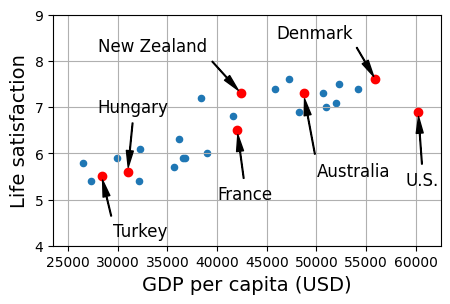

In [ ]:
country_stats.plot(kind='scatter', figsize=(5, 3), grid=True,
                   x=gdppc_col, y=lifesat_col)

min_life_sat = 4
max_life_sat = 9

position_text = {
    "Turkey": (29_500, 4.2),
    "Hungary": (28_000, 6.9),
    "France": (40_000, 5),
    "New Zealand": (28_000, 8.2),
    "Australia": (50_000, 5.5),
    "United States": (59_000, 5.3),
    "Denmark": (46_000, 8.5)
}

for country, pos_text in position_text.items():
    pos_data_x = country_stats[gdppc_col].loc[country]
    pos_data_y = country_stats[lifesat_col].loc[country]
    country = "U.S." if country == "United States" else country
    plt.annotate(country, xy=(pos_data_x, pos_data_y),
                 xytext=pos_text, fontsize=12,
                 arrowprops=dict(facecolor='black', width=0.5,
                                 shrink=0.08, headwidth=5))
    plt.plot(pos_data_x, pos_data_y, "ro")

plt.axis([min_gdp, max_gdp, min_life_sat, max_life_sat])

plt.show()

In [ ]:
highlighted_countries = country_stats.loc[list(position_text.keys())]
highlighted_countries[[gdppc_col, lifesat_col]].sort_values(by=gdppc_col)

,GDP per capita (USD),Life satisfaction
Country,,
Turkey,28384.987785,5.5
Hungary,31007.768407,5.6
France,42025.617373,6.5
New Zealand,42404.393738,7.3
Australia,48697.837028,7.3
Denmark,55938.212809,7.6
United States,60235.728492,6.9


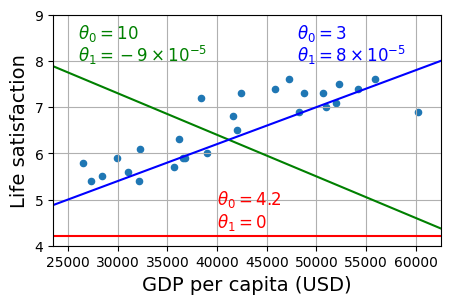

In [ ]:
country_stats.plot(kind='scatter', figsize=(5, 3), grid=True,
                   x=gdppc_col, y=lifesat_col)

X = np.linspace(min_gdp, max_gdp, 1000)

w1, w2 = 4.2, 0
plt.plot(X, w1 + w2 * 1e-5 * X, "r")
plt.text(40_000, 4.9, fr"$\theta_0 = {w1}$", color="r")
plt.text(40_000, 4.4, fr"$\theta_1 = {w2}$", color="r")

w1, w2 = 10, -9
plt.plot(X, w1 + w2 * 1e-5 * X, "g")
plt.text(26_000, 8.5, fr"$\theta_0 = {w1}$", color="g")
plt.text(26_000, 8.0, fr"$\theta_1 = {w2} \times 10^{{-5}}$", color="g")

w1, w2 = 3, 8
plt.plot(X, w1 + w2 * 1e-5 * X, "b")
plt.text(48_000, 8.5, fr"$\theta_0 = {w1}$", color="b")
plt.text(48_000, 8.0, fr"$\theta_1 = {w2} \times 10^{{-5}}$", color="b")

plt.axis([min_gdp, max_gdp, min_life_sat, max_life_sat])
plt.show()

In [ ]:
from sklearn import linear_model

X_sample = country_stats[[gdppc_col]].values
y_sample = country_stats[[lifesat_col]].values

lin1 = linear_model.LinearRegression()
lin1.fit(X_sample, y_sample)

t0, t1 = lin1.intercept_[0], lin1.coef_[0][0]
print(f"θ0={t0:.2f}, θ1={t1:.2e}")

θ0=3.75, θ1=6.78e-05


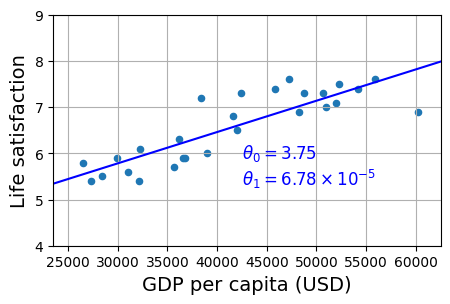

In [ ]:
country_stats.plot(kind='scatter', figsize=(5, 3), grid=True,
                   x=gdppc_col, y=lifesat_col)

X = np.linspace(min_gdp, max_gdp, 1000)
plt.plot(X, t0 + t1 * X, "b")

plt.text(max_gdp - 20_000, min_life_sat + 1.9,
         fr"$\theta_0 = {t0:.2f}$", color="b")
plt.text(max_gdp - 20_000, min_life_sat + 1.3,
         fr"$\theta_1 = {t1 * 1e5:.2f} \times 10^{{-5}}$", color="b")

plt.axis([min_gdp, max_gdp, min_life_sat, max_life_sat])
plt.show()

#### Cyprus는 GDP데이터는 있지만 만족도 데이터는 없음

In [ ]:
print(gdp_per_capita[gdppc_col].loc["Cyprus"])
print(oecd_bli.reindex(["Cyprus"])[lifesat_col])

37655.1803457421
Country
Cyprus   NaN
Name: Life satisfaction, dtype: float64


In [ ]:
cyprus_gdp_per_capita = gdp_per_capita[gdppc_col].loc["Cyprus"]
cyprus_gdp_per_capita

37655.1803457421

In [ ]:
cyprus_predicted_life_satisfaction = lin1.predict([[cyprus_gdp_per_capita]])[0, 0]
cyprus_predicted_life_satisfaction

6.301656332738056

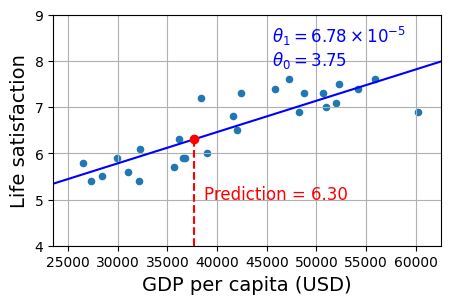

In [ ]:
country_stats.plot(kind='scatter', figsize=(5, 3), grid=True,
                   x=gdppc_col, y=lifesat_col)

X = np.linspace(min_gdp, max_gdp, 1000)
plt.plot(X, t0 + t1 * X, "b")

plt.text(min_gdp + 22_000, max_life_sat - 1.1,
         fr"$\theta_0 = {t0:.2f}$", color="b")
plt.text(min_gdp + 22_000, max_life_sat - 0.6,
         fr"$\theta_1 = {t1 * 1e5:.2f} \times 10^{{-5}}$", color="b")

plt.plot([cyprus_gdp_per_capita, cyprus_gdp_per_capita],
         [min_life_sat, cyprus_predicted_life_satisfaction], "r--")
plt.text(cyprus_gdp_per_capita + 1000, 5.0,
         fr"Prediction = {cyprus_predicted_life_satisfaction:.2f}", color="r")
plt.plot(cyprus_gdp_per_capita, cyprus_predicted_life_satisfaction, "ro")

plt.axis([min_gdp, max_gdp, min_life_sat, max_life_sat])

plt.show()

#### GDP가 23,500보다 작거나, 62,500보다 큰 나라들의 데이터를 기준으로 분석하면

min_gdp = 23_500

max_gdp = 62_500

In [ ]:
missing_data = full_country_stats[(full_country_stats[gdppc_col] < min_gdp) |
                                  (full_country_stats[gdppc_col] > max_gdp)]
missing_data

,GDP per capita (USD),Life satisfaction
Country,,
South Africa,11466.189672,4.7
Colombia,13441.492952,6.3
Brazil,14063.982505,6.4
Mexico,17887.750736,6.5
Chile,23324.524751,6.5
Norway,63585.903514,7.6
Switzerland,68393.306004,7.5
Ireland,89688.956958,7.0
Luxembourg,110261.157353,6.9


In [ ]:
# 주석을 적기위한 위치 정의
position_text_missing_countries = {
    "South Africa": (20_000, 4.2),
    "Colombia": (6_000, 8.2),
    "Brazil": (18_000, 7.8),
    "Mexico": (24_000, 7.4),
    "Chile": (30_000, 7.0),
    "Norway": (51_000, 6.2),
    "Switzerland": (62_000, 5.7),
    "Ireland": (81_000, 5.2),
    "Luxembourg": (92_000, 4.7),
}

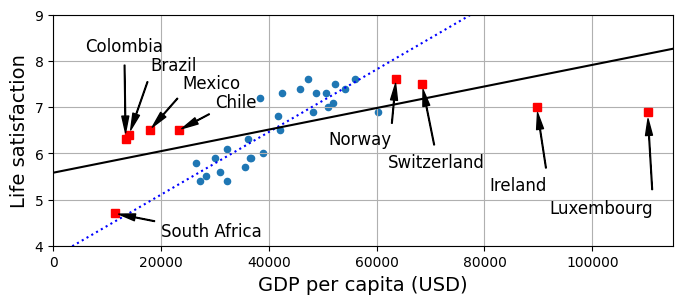

In [ ]:
full_country_stats.plot(kind='scatter', figsize=(8, 3),
                        x=gdppc_col, y=lifesat_col, grid=True)

for country, pos_text in position_text_missing_countries.items():
    pos_data_x, pos_data_y = missing_data.loc[country]
    plt.annotate(country, xy=(pos_data_x, pos_data_y),
                 xytext=pos_text, fontsize=12,
                 arrowprops=dict(facecolor='black', width=0.5,
                                 shrink=0.08, headwidth=5))
    plt.plot(pos_data_x, pos_data_y, "rs") #붉은색 사각형 점

X = np.linspace(0, 115_000, 1000)

# 파란색점(중간에 분포한 국가)에 대한 선형회귀 선
plt.plot(X, t0 + t1 * X, "b:")

lin_reg_full = linear_model.LinearRegression()
Xfull = np.c_[full_country_stats[gdppc_col]]
yfull = np.c_[full_country_stats[lifesat_col]]
lin_reg_full.fit(Xfull, yfull)

t0full, t1full = lin_reg_full.intercept_[0], lin_reg_full.coef_[0][0]
X = np.linspace(0, 115_000, 1000)
plt.plot(X, t0full + t1full * X, "k")

plt.axis([0, 115_000, min_life_sat, max_life_sat])
plt.show()

#### missing_data(붉은색)만으로 선형회귀 한 결과를 추가

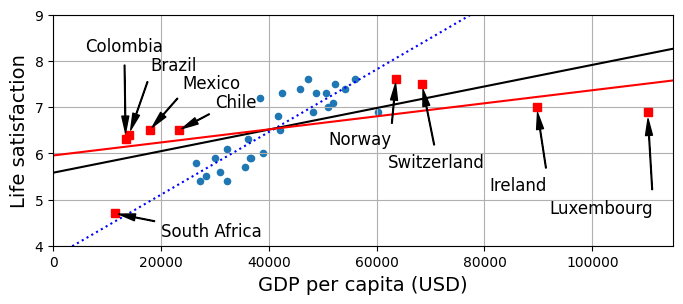

In [ ]:
full_country_stats.plot(kind='scatter', figsize=(8, 3),
                        x=gdppc_col, y=lifesat_col, grid=True)

for country, pos_text in position_text_missing_countries.items():
    pos_data_x, pos_data_y = missing_data.loc[country]
    plt.annotate(country, xy=(pos_data_x, pos_data_y),
                 xytext=pos_text, fontsize=12,
                 arrowprops=dict(facecolor='black', width=0.5,
                                 shrink=0.08, headwidth=5))
    plt.plot(pos_data_x, pos_data_y, "rs") #붉은색 사각형 점

X = np.linspace(0, 115_000, 1000)

# 파란색점(중간에 분포한 국가)에 대한 선형회귀 선
plt.plot(X, t0 + t1 * X, "b:")

lin_reg_full = linear_model.LinearRegression()
Xfull = np.c_[full_country_stats[gdppc_col]]
yfull = np.c_[full_country_stats[lifesat_col]]
lin_reg_full.fit(Xfull, yfull)

t0full, t1full = lin_reg_full.intercept_[0], lin_reg_full.coef_[0][0]
X = np.linspace(0, 115_000, 1000)
plt.plot(X, t0full + t1full * X, "k")

#missing_data
lin_reg_missing = linear_model.LinearRegression()
Xmiss = np.c_[missing_data[gdppc_col]]
ymiss = np.c_[missing_data[lifesat_col]]
lin_reg_missing.fit(Xmiss, ymiss)

t0miss, t1miss = lin_reg_missing.intercept_[0], lin_reg_missing.coef_[0][0]
X = np.linspace(0, 115_000, 1000)
plt.plot(X, t0miss + t1miss * X, "r")


plt.axis([0, 115_000, min_life_sat, max_life_sat])
plt.show()

#### 전체 데이터를 기준으로 다항회귀를 한 경우

2차

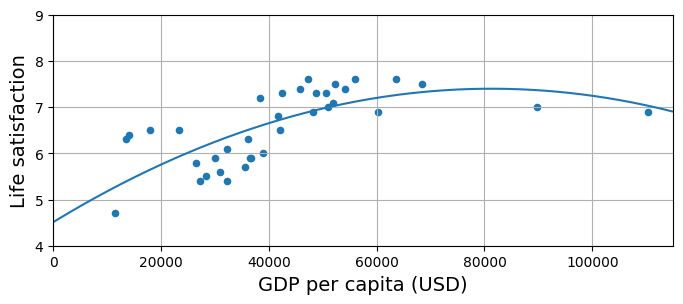

In [ ]:
from sklearn import preprocessing
from sklearn import pipeline

full_country_stats.plot(kind='scatter', figsize=(8, 3),
                        x=gdppc_col, y=lifesat_col, grid=True)

poly = preprocessing.PolynomialFeatures(degree=2, include_bias=False)
scaler = preprocessing.StandardScaler()
lin_reg2 = linear_model.LinearRegression()

pipeline_reg = pipeline.Pipeline([
    ('poly', poly),
    ('scal', scaler),
    ('lin', lin_reg2)])
pipeline_reg.fit(Xfull, yfull)
curve = pipeline_reg.predict(X[:, np.newaxis])
plt.plot(X, curve)

plt.axis([0, 115_000, min_life_sat, max_life_sat])
plt.show()

3차

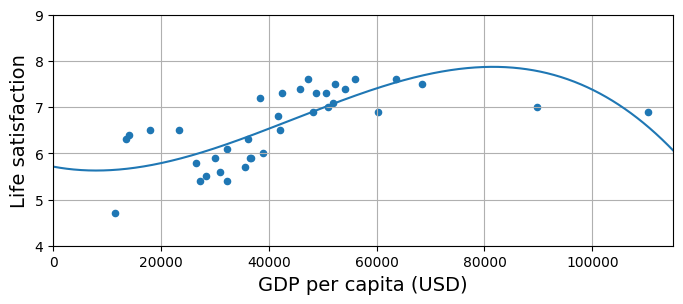

In [ ]:
from sklearn import preprocessing
from sklearn import pipeline

full_country_stats.plot(kind='scatter', figsize=(8, 3),
                        x=gdppc_col, y=lifesat_col, grid=True)

poly = preprocessing.PolynomialFeatures(degree=3, include_bias=False)
scaler = preprocessing.StandardScaler()
lin_reg2 = linear_model.LinearRegression()

pipeline_reg = pipeline.Pipeline([
    ('poly', poly),
    ('scal', scaler),
    ('lin', lin_reg2)])
pipeline_reg.fit(Xfull, yfull)
curve = pipeline_reg.predict(X[:, np.newaxis])
plt.plot(X, curve)

plt.axis([0, 115_000, min_life_sat, max_life_sat])
plt.show()

4차

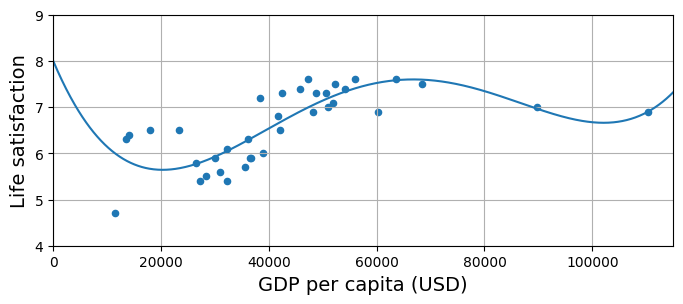

In [ ]:
from sklearn import preprocessing
from sklearn import pipeline

full_country_stats.plot(kind='scatter', figsize=(8, 3),
                        x=gdppc_col, y=lifesat_col, grid=True)

poly = preprocessing.PolynomialFeatures(degree=4, include_bias=False)
scaler = preprocessing.StandardScaler()
lin_reg2 = linear_model.LinearRegression()

pipeline_reg = pipeline.Pipeline([
    ('poly', poly),
    ('scal', scaler),
    ('lin', lin_reg2)])
pipeline_reg.fit(Xfull, yfull)
curve = pipeline_reg.predict(X[:, np.newaxis])
plt.plot(X, curve)

plt.axis([0, 115_000, min_life_sat, max_life_sat])
plt.show()

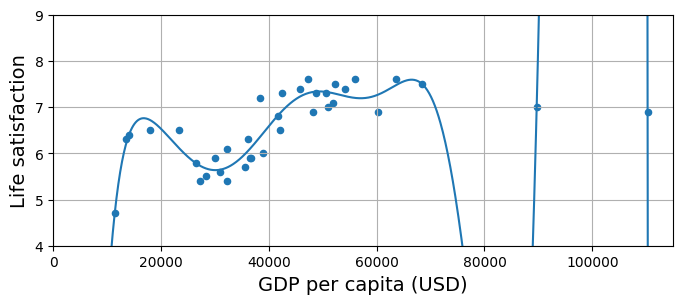

In [ ]:
from sklearn import preprocessing
from sklearn import pipeline

full_country_stats.plot(kind='scatter', figsize=(8, 3),
                        x=gdppc_col, y=lifesat_col, grid=True)

poly = preprocessing.PolynomialFeatures(degree=10, include_bias=False)
scaler = preprocessing.StandardScaler()
lin_reg2 = linear_model.LinearRegression()

pipeline_reg = pipeline.Pipeline([
    ('poly', poly),
    ('scal', scaler),
    ('lin', lin_reg2)])
pipeline_reg.fit(Xfull, yfull)
curve = pipeline_reg.predict(X[:, np.newaxis])
plt.plot(X, curve)

plt.axis([0, 115_000, min_life_sat, max_life_sat])
plt.show()

### 선형회귀시 규제(ridge)를 이용 회귀분석

L2 정규화 이용하여 제약을 가함

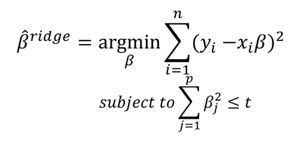

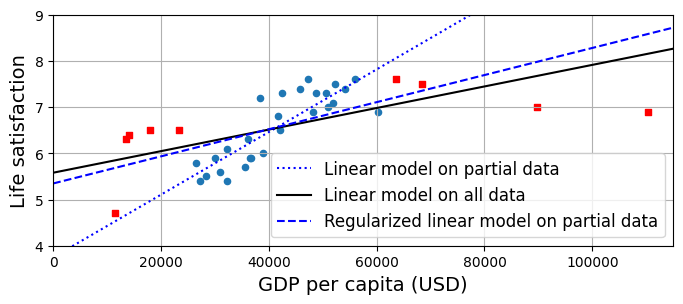

In [ ]:
country_stats.plot(kind='scatter', x=gdppc_col, y=lifesat_col, figsize=(8, 3))
missing_data.plot(kind='scatter', x=gdppc_col, y=lifesat_col,
                  marker="s", color="r", grid=True, ax=plt.gca())

X = np.linspace(0, 115_000, 1000)
plt.plot(X, t0 + t1*X, "b:", label="Linear model on partial data")
plt.plot(X, t0full + t1full * X, "k-", label="Linear model on all data")

ridge = linear_model.Ridge(alpha=10**9.5)
X_sample = country_stats[[gdppc_col]]
y_sample = country_stats[[lifesat_col]]
ridge.fit(X_sample, y_sample)
t0ridge, t1ridge = ridge.intercept_[0], ridge.coef_[0][0]
plt.plot(X, t0ridge + t1ridge * X, "b--",
         label="Regularized linear model on partial data")
plt.legend(loc="lower right")

plt.axis([0, 115_000, min_life_sat, max_life_sat])
plt.show()

# 과제

## 국가명에 `W`가 포함된 나라에 대한 분석


### `W`가 포함된 나라중에 만족도 조사가 있는 4개 나라를 이용하여 선형회귀 train

In [ ]:
w_countries = [c for c in full_country_stats.index if "W" in c.upper()]
w_countries

['New Zealand', 'Sweden', 'Norway', 'Switzerland']

In [ ]:
w_countries = [c for c in full_country_stats.index if "W" in c.upper()]
full_country_stats.loc[w_countries][[lifesat_col,gdppc_col]]

,Life satisfaction,GDP per capita (USD)
Country,,
New Zealand,7.3,42404.393738
Sweden,7.3,50683.323510
Norway,7.6,63585.903514
Switzerland,7.5,68393.306004


### W가 포함된 모든 나라중 만족도 조사가 없는 나라에 대한 회귀

회귀 결과를 그래프로 표시하라

In [ ]:
# 'W'를 포함하는 국가만 필터링
all_w_countries = [c for c in gdp_per_capita.index if ('W' in c.upper()) and (c not in ['Africa Western and Central', 'Arab World', 'Lower middle income', 'Low & middle income', 'World'])]

gdp_per_capita.loc[all_w_countries].sort_values(by=gdppc_col)

,GDP per capita (USD)
Country,
Malawi,1486.778248
Rwanda,2098.710362
Zimbabwe,2744.690758
Papua New Guinea,4101.218882
Eswatini,8392.717564
Botswana,16040.008473
New Zealand,42404.393738
Sweden,50683.323510
Norway,63585.903514


#### (1) 4개 나라의 산점도 그리기

아래 네 나라에 대한 산점도를 파란색 점으로 그리시오

|Country	||
|:--|:-:|
|New Zealand|	7.3|
|Sweden|	7.3|
|Norway|	7.6|
|Switzerland|	7.5|

#### (2) 선형 회귀 분석 하여 직선의 식 그래프로 그리기


그래프에 회귀 분석한 직선을 함께 그리세요

(3) 나머지 나라에 대해 추정 만족도를 추가하고 산점도 그래프에 검은색 점으로 포함하세요



|Country	| GDP| Satisfaction|
|:--|:-:|:-:|
|Malawi|	1486.778248|
|Rwanda|	2098.710362|
|Zimbabwe|	2744.690758|
|Papua New Guinea|	4101.218882|
|Eswatini|	8392.717564|
|Botswana|	16040.008473|


In [3]:

test_array = np.array([1, 4, 5, "8"], float)
print(test_array)


[1. 4. 5. 8.]


In [4]:
print(type(test_array[3]))


<class 'numpy.float64'>


In [5]:
test_array[3]

8.0